In [1]:
%matplotlib inline  
# Figures plotted inside the notebook
%config InlineBackend.figure_format = 'retina'
# High quality figures
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import gensim

In [2]:
## Load NLTK Modules
import nltk
import string
nltk.download('punkt')
punctuation = string.punctuation
nltk.download('wordnet')
from nltk.stem.wordnet import WordNetLemmatizer
lemmatizer  = WordNetLemmatizer()
from nltk.stem.snowball import SnowballStemmer
snowball = SnowballStemmer('english')
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords   = set(nltk.corpus.stopwords.words('english'))
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\yajai\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\yajai\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\yajai\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\yajai\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

# Reviews de la base de datos YELP academic

En este homework vamos a trabajar con el [Yelp_academic_dataset](https://www.kaggle.com/yelp-dataset/yelp-dataset) que como sabemos contiene revisiones de negocios y establecimientos en 11 áreas metropolitanas de 4 países recogidas de usuarios del servicio Yelp. 

A diferencia de en la sesión de introducción donde ya usasteis este dataset  con la información de los negocios, aquí nos vamos a centrar en la información de las *reviews* y vamos a predecir el *rating* asociado a cada *review* a partir del contenido textual de estas *reviews*. Además, para facilitar el procesado de los datos, ya que el dataset original contine millones de *reviews*, hemos hecho una seleccion de unas 3500 *reviews* con las que trabajar en este homework.

A lo largo del notebook se le pedirá que resuelva diferentes ejercicios, junto con la resolución de cada uno, por favor, **comente los resultados obtenidos**. Cuando realice cualquier elección de diseño, por favor, justifiquela adecuadamente. Todo ello se valorará de cara a la evaluación de la práctica.

La siguiente celda de código carga el fichero que hemos preparado para este homework y separa las variables de texto con las reviews (que seran nuestras observaciones de entrada) de las etiquetas o variable objetivo del problema que serán las `stars`.

In [3]:
reviews_df = pd.read_csv("http://www.tsc.uc3m.es/~vanessa/data_notebooks/yelp/yelp_review_red.csv.zip")
reviews_df.head()

text  stars
0  Coconut's Fish Cafe is a fantastic, Five Stars...      4
1  I stopped by at Prime tonight after a grueling...      5
2  This place is unprofessional in every way poss...      1
3  Driving more than an half-hour to get to a gun...      4
4  Four of us met here for lunch so that we could...      5

In [4]:
reviews=list(reviews_df['text'])
print(len(reviews))
# Get labels
y = reviews_df['stars']

3533


# Ejercicio 1. Preprocesado de texto (2 ptos)

Aplique el pipeline estandar visto en la sesión de NLP (tokenización, homogeneización y limpieza) para el preprocesado de las reviews.

Nota: de este preprocesado elimine el *stemming* y aplique solo la lematización para obtener palabras completas que podamos analizar y utilizar más adelante.


In [9]:
def normalize(text) : 
    return[lemmatizer.lemmatize(t) for t in nltk.wordpunct_tokenize(text.lower()) if (t.isalnum()) and (t not in punctuation) and (t not in stopwords)]
reviews_pre = []
for text in reviews:
    reviews_pre.append(normalize(text))
print(reviews_pre[:2])

[['coconut', 'fish', 'cafe', 'fantastic', 'five', 'star', 'fish', 'cafe', 'five', 'u', 'drove', 'lunch', 'hour', 'lucky', 'u', 'customer', 'line', 'nice', 'good', 'sign', 'ur', 'working', 'clock', 'ordered', 'póke', 'photo', '11', '99', 'outstanding', 'love', 'fresh', 'tuna', 'coconut', 'might', 'best', 'every', 'order', 'see', 'coworkers', 'ordered', 'chicken', 'taco', '11', '99', 'steak', 'taco', 'photo', '11', '49', 'fish', 'taco', '10', '99', 'cup', 'chowder', '5', '74', 'add', 'ipas', 'soft', 'drink', 'averaged', '15', 'tried', 'friend', 'josh', 'fish', 'taco', 'great', 'four', 'star', 'review', 'georgie', 'well', 'non', 'fish', 'group', 'thought', 'average', 'okay', 'go', 'place', 'called', 'coconut', 'fish', 'cafe', 'order', 'chicken', 'steak', 'sorry', 'lol', 'step', 'away', 'meat', 'taco', 'guy', 'one', 'get', 'hurt', 'order', 'poke', 'fish', 'shrimp', 'taco', 'fall', 'love', 'coconut', 'fish', 'cafe', 'enjoy'], ['stopped', 'prime', 'tonight', 'grueling', '9', 'hour', 'busines

# Ejercicio 2. Vectorización de la información textual (2 ptos)

A partir del contenido preprocesado de las reviews, genere una representación vectorial para cada review. Para esta representación utilice:
1. BoW
2. TF-IDF

Como para generar estas representaciones necesita definir un diccionario, antes de generar la representación vectorial, analice el diccionario generado y, con el criterio o criterios que considere más adecuados, limite su tamaño a 1000 términos.


## 2.1 Creacción del diccionario

In [10]:
tokens_corpus = [token for doc in reviews_pre for token in doc]
counts  = nltk.FreqDist(tokens_corpus)

In [11]:
counts

FreqDist({'one': 2904, 'time': 2865, 'get': 2759, 'like': 2759, 'good': 2587, 'place': 2529, 'would': 2431, 'back': 1880, 'food': 1877, 'service': 1836, ...})

In [12]:
vocab   = len(counts.keys())
words   = sum(counts.values())
lexdiv  = float(words) / float(vocab)

print("El corpus tiene %i palabras únicas y un total de %i palabras con una diversidad léxica de %0.3f" % (vocab, words, lexdiv))

El corpus tiene 24212 palabras únicas y un total de 466213 palabras con una diversidad léxica de 19.255


#<SOL>
Para limpiar del diccionario: elegir los 1000 términos más relevantes tenemos en cuenta:
* No hay palabras que están en más 1500-2000 documentos (de 3500) no hace falta fijar `no_above` 
* Para que se quede como mucho con 1000, n_keep = 1000
* Ya no es necesario fijar no_below porque n_keep va a poner ese corte para quedarse con 1000

#</SOL>


In [14]:
import gensim

# Create dictionary of tokens: the input is the preprocessed corpus
D = gensim.corpora.Dictionary(reviews_pre)
n_tokens = len(D)

print('The dictionary contains', n_tokens, 'terms')
print('First terms in the dictionary:')
for n in range(10):
    print(str(n), ':', D[n])

The dictionary contains 24212 terms
First terms in the dictionary:
0 : 10
1 : 11
2 : 15
3 : 49
4 : 5
5 : 74
6 : 99
7 : add
8 : average
9 : averaged


In [16]:
D.filter_extremes(keep_n = 1000)
n_tokens = len(D)

In [20]:
n_tokens

1000

## 2.2 Representación BoW
Obtenga la representación BoW de las reviews preprocesadas.

In [21]:
corpus_bow = [D.doc2bow(doc) for doc in reviews_pre]

C:\Users\yajai\AppData\Local\Temp\ipykernel_4960\4233235187.py:5: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(words,counts, use_line_collection = True)


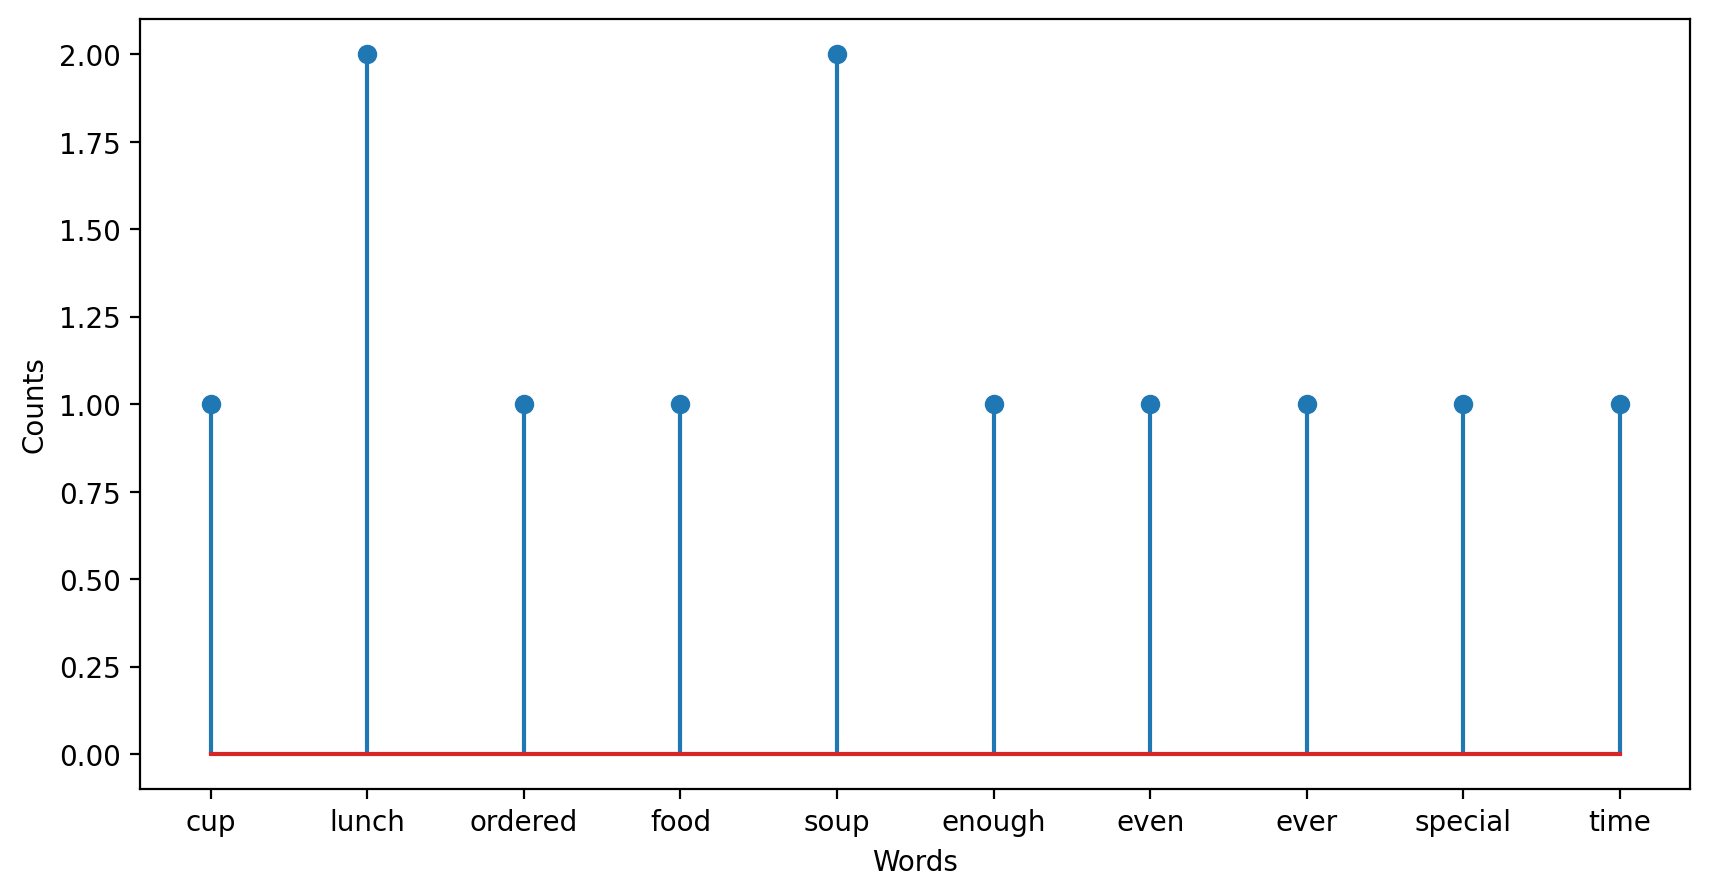

In [24]:
n_doc=50
list_word_counts = [(D[doc_bow[0]], doc_bow[1]) for doc_bow in corpus_bow[n_doc][:10]]
(words, counts) = zip(*list_word_counts)
plt.figure(figsize=(10,5))
plt.stem(words,counts, use_line_collection = True)
plt.xlabel('Words')
plt.ylabel('Counts')
plt.show()

## 2.3 Representación TF-IDF
Obtenga la representación TF-IDF de las reviews preprocesadas.

C:\Users\yajai\AppData\Local\Temp\ipykernel_4960\2257287136.py:12: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(words,counts, use_line_collection = True)


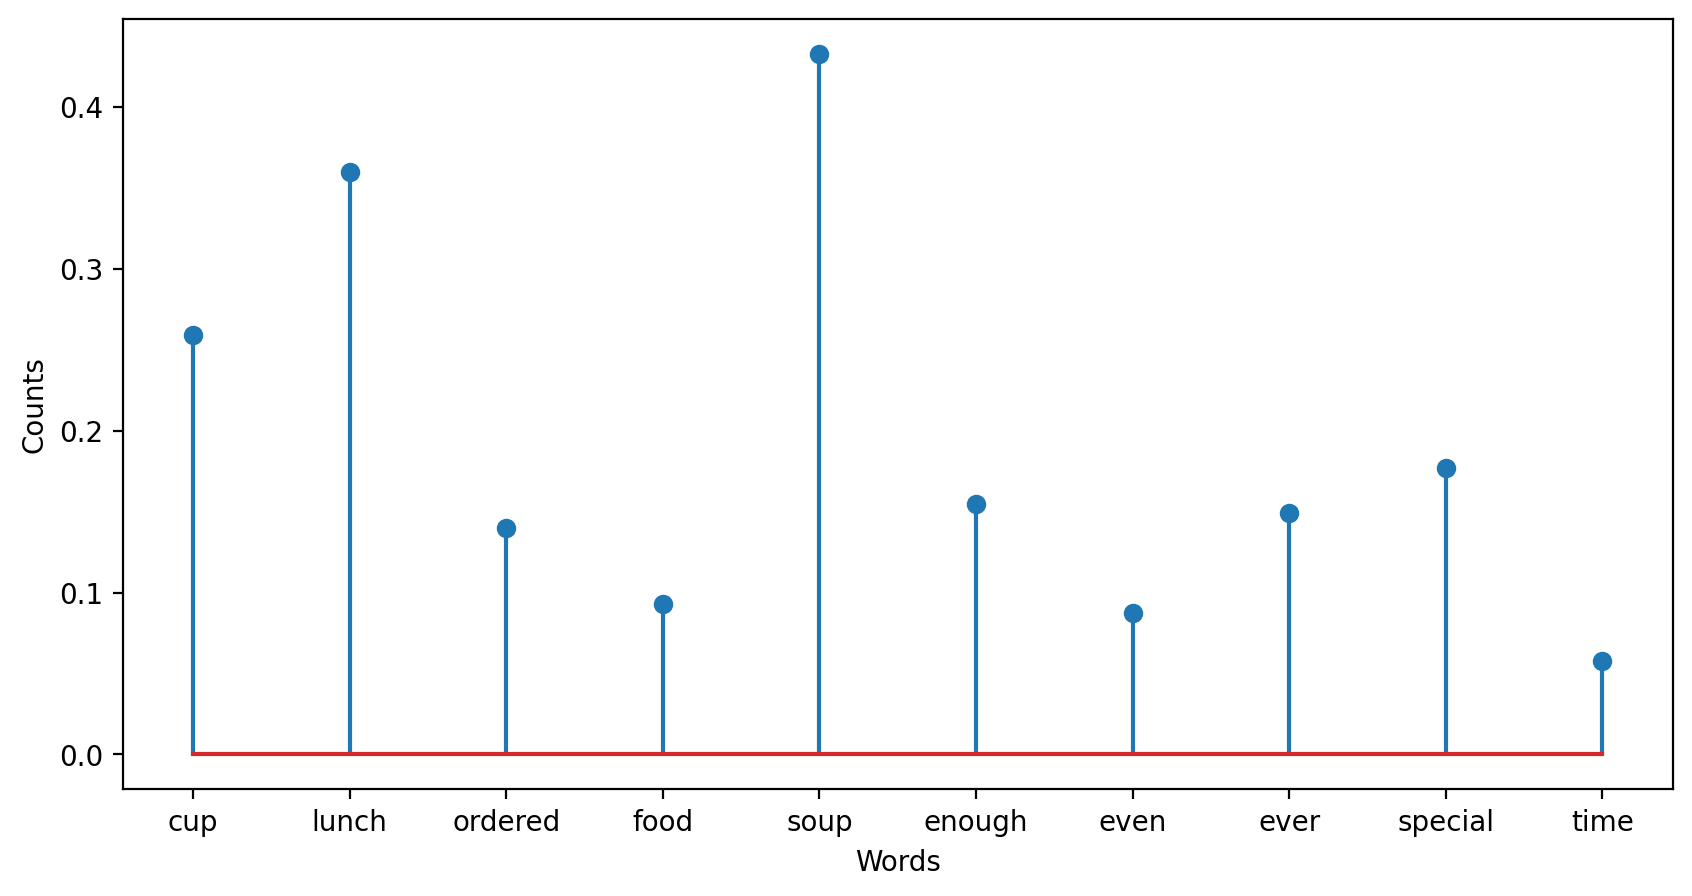

In [27]:
from gensim.models import TfidfModel

model = TfidfModel(corpus_bow)
vector = model[corpus_bow[0]] 
corpus_tfidf = model[corpus_bow] 

n_doc=50
list_word_counts = [(D[doc_bow[0]], doc_bow[1]) for doc_bow in corpus_bow[n_doc][:10]]
list_tfidf = [(D[doc_tfidf[0]], doc_tfidf[1]) for doc_tfidf in corpus_tfidf[n_doc][:10]]
(words, counts) = zip(*list_tfidf)
plt.figure(figsize=(10,5))
plt.stem(words,counts, use_line_collection = True)
plt.xlabel('Words')
plt.ylabel('Counts')
plt.show()

## 2.4 Conversión a matrices sparse

Use la función `corpus2csc` para convertir las representaciones BoW y TF-IDF a matrices sparse con las que poder trabajar en las siguientes secciones.

In [28]:
from gensim.matutils import corpus2dense, corpus2csc

n_tokens = len(D)
num_docs = len(corpus_bow)
# Convert BoW representacion
corpus_bow_dense = corpus2dense(corpus_bow, num_terms=n_tokens, num_docs=num_docs).T
corpus_bow_sparse = corpus2csc(corpus_bow, num_terms=n_tokens, num_docs=num_docs).T
# Convert TFIDF representacion
corpus_tfidf_dense = corpus2dense(corpus_tfidf, num_terms=n_tokens, num_docs=num_docs).T
corpus_tfidf_sparse = corpus2csc(corpus_tfidf, num_terms=n_tokens, num_docs=num_docs).T

In [29]:
corpus_bow_sparse,corpus_tfidf_sparse

(<3533x1000 sparse matrix of type '<class 'numpy.float64'>'
 	with 223369 stored elements in Compressed Sparse Row format>,
 <3533x1000 sparse matrix of type '<class 'numpy.float64'>'
 	with 223369 stored elements in Compressed Sparse Row format>)

# Ejercicio 3. Modelos de predicción con BoW y TFIDF  (2 ptos)

Utilice las representaciones vectoriales obtenidas anteriormente para predecir la puntuación asociada a cada review. Para esta predicción utilice y compare un regresor tipo k-NN (con la distancia coseno) y un modelo *Ridge Regression* lineal.

Para el entrenamiento y evalaución de estos modelos considere:
* 40% de los datos para entrenar y 60% para testear
* Aplique un proceso de CV con 5 fold para validar adecuadamente los parámetros libres de cada modelo
* Evalúe las prestaciones finales en términos de $R^2$.

Además, no se olvide de normalizar los datos 
si lo considera necesario, en cuyo caso justifique la normalización aplicada.

Por último, compare y comente los resultados obtenidos. ¿Qué representación de los datos da mejores resultados? ¿Qué regresor funciona mejor? ¿A qué cree que puede deberse?

In [30]:
corpus_bow_array = corpus_bow_sparse.toarray()
corpus_tfidf_array = corpus_tfidf_sparse.toarray()

In [31]:
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score


**K-NN y *Ridge Regression* con BOW**

In [33]:
X_train, X_test, y_train, y_test = train_test_split(corpus_bow_array, y, test_size=0.6, random_state=42)
knn = KNeighborsRegressor(metric='cosine')
ridge = Ridge()
knn_params = {'n_neighbors': [1, 3, 5, 7, 9]}
ridge_params = {'alpha': [0.001, 0.01, 0.1, 1, 10]}

# Búsqueda en la cuadrícula con validación cruzada
knn_cv = GridSearchCV(knn, knn_params, cv=5)
knn_cv.fit(X_train, y_train)

ridge_cv = GridSearchCV(ridge, ridge_params, cv=5)
ridge_cv.fit(X_train, y_train)

y_pred_knn = knn_cv.predict(X_test)
y_pred_ridge = ridge_cv.predict(X_test)

In [36]:
r2_score(y_test,y_pred_knn), r2_score(y_test,y_pred_ridge)

(0.43660468268723707, 0.12959309262671814)

**K-NN y *Ridge Regression* con TF-IDF**

In [37]:
X_train, X_test, y_train, y_test = train_test_split(corpus_tfidf_array, y, test_size=0.6, random_state=42)
knn = KNeighborsRegressor(metric='cosine')
ridge = Ridge()
knn_params = {'n_neighbors': [1, 3, 5, 7, 9]}
ridge_params = {'alpha': [0.001, 0.01, 0.1, 1, 10]}

# Búsqueda en la cuadrícula con validación cruzada
knn_cv = GridSearchCV(knn, knn_params, cv=5)
knn_cv.fit(X_train, y_train)

ridge_cv = GridSearchCV(ridge, ridge_params, cv=5)
ridge_cv.fit(X_train, y_train)

y_pred_knn = knn_cv.predict(X_test)
y_pred_ridge = ridge_cv.predict(X_test)

In [38]:
r2_score(y_test,y_pred_knn), r2_score(y_test,y_pred_ridge)

(0.41341210964454533, 0.590622103073779)

# Ejercicio 4. *Embeddings* (2 ptos)

En este ejercicio vamos a utilizar algunos de los *embeddings* que hemos visto para reducir la dimensión de las representaciones vectoriales obtenidas anteriomente. En concreto, vamos a usar tres tipos de *embeddings* en esta sección:
* *Principal Component Analysis* (PCA)
* *Spectral Embedding*
* *Embedding con K-means*

Para simplificar este análisis, a partir de ahora solo vamos a trabajar con la representación TF-IDF. Así que obtenga para los vectores TF-IDF el *embedding* asociado y utilícelo para ver las prestaciones que nos daría el modelo de *ridge regression* lineal. Obtenga estas prestaciones para un *embedding* de tamaño 2, 10, 25, 50 y 100 y analice cómo influye el tamaño del *embedding* en las prestaciones del regresor.

Por último, para el *embedding* de dimensión 2 haga una representación del mismo, donde cada *review* será un punto en este espacio bidimensional y asígnele diferentes colores según las puntuaciones que tenga asociadas (por ejemplo, las *reviews* con puntuación 1 las visualizamos en rojo, las *reviews* con puntuación 2 las visualizamos en azul, ...). 

Finalmente, analice los resultados obtenidos.


## 4.1 *Embeddings* con PCA

El método PCA de sklearn no trabaja con matrices sparse, así que para poder aplicar esta transformación de los datos, tendrá que comenzar transformando la representación sparse TF-IDF a una representación densa (para ello puede usar el método `.toarray()` de las matrices sparse).

## 4.2 *Spectral Embeddings* 
Evalúe aquí las pretaciones proporcionadas por un *Spectral Embedding* usando como matriz de afinidad un kernel [chi_square](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.pairwise.chi2_kernel.html) definido como:

$$k(x, y) = \exp \left(-\gamma \sum_{d=1}^D \frac{(x_d - y_d)^2}{x_d + y_d}\right)$$
con parámetro $\gamma$ igual a 1 (valor por defecto). Este kernel suele usarse para medir distancias entre histogramas por lo que es una buena opción para medir distancias entre representaciones TF-IDF.

Recuerde que tendrá que calcular esta proyección de manera conjunta sobre los datos de entrenamiento y test y luego volver a separar los datasets. Además, tenga en cuenta que el kernel chi_square no funciona con datos  *sparse*, así que deberá volver transformar los datos a formato denso.

In [48]:
from sklearn.decomposition import PCA

param_grid = {
    'n_components': np.arange(1,100)}
pca_grid = GridSearchCV(PCA(), param_grid, cv=5)
x_pca = pca_grid.fit(corpus_tfidf_sparse.toarray(),y)

In [47]:
pca_grid.best_estimator_.n_components

71

In [53]:
from sklearn.manifold import SpectralEmbedding
K=71
spectral = SpectralEmbedding(n_components=K) # Por defecto la matriz de adyacencia se calcula con los vecinos más próximos
X_spectral = spectral.fit_transform(corpus_tfidf_sparse)

X_spectral_train, X_spectral_test, Y_train, Y_test = train_test_split(X_spectral, y, test_size=0.6)
scaler = StandardScaler().fit(X_spectral_train)
X_spectral_train = scaler.transform(X_spectral_train)
X_spectral_test = scaler.transform(X_spectral_test)

C:\Users\yajai\Anaconda3\lib\site-packages\sklearn\manifold\_spectral_embedding.py:626: UserWarning: Nearest neighbors affinity currently does not support sparse input, falling back to rbf affinity
  warnings.warn(


## 4.2 *Embeddings* con K-means

El método K-means sí admite la representación *sparse* de los datos, así que no hace falta que en este caso convierta sus datos a formato denso.

In [56]:
from sklearn import neighbors
param_grid = {
    'n_neighbors': np.arange(1,10)}

grid_spectral = GridSearchCV(neighbors.KNeighborsClassifier( ), param_grid, cv=5)
grid_spectral.fit(X_spectral_train, Y_train)

# Test
accuracy_train_knn = grid_spectral.score(X_spectral_train,Y_train)
accuracy_test_knn = grid_spectral.score(X_spectral_test,Y_test)

accuracy_test_knn

0.4669811320754717

# Ejercicio 5. *Embeddings* con *Word2Vec* (2 ptos)

En esta última sección vamos a obtener la representación *Word2Vec* para obtener un *embedding* de las palabras de nuestro corpus de *reviews* y luego utilizaremos esta representación para predecir la puntuación de cada *review*.

Para ello, vaya resolviendo los siguientes apartados:

## 5.1 *Word2Vec* de las palabras del corpus de *reviews*

Comience entrenando una red neuronal del tipo word2vec para obtener un *embedding* de tamaño 200 con un tamaño de ventana de 5 y eliminando las palabras que aparecen en menos de 20 documentos.

Extraiga del modelo el *embedding* aprendido y use el algoritmo t-SNE para representar este  *embedding* en dos dimensiones.

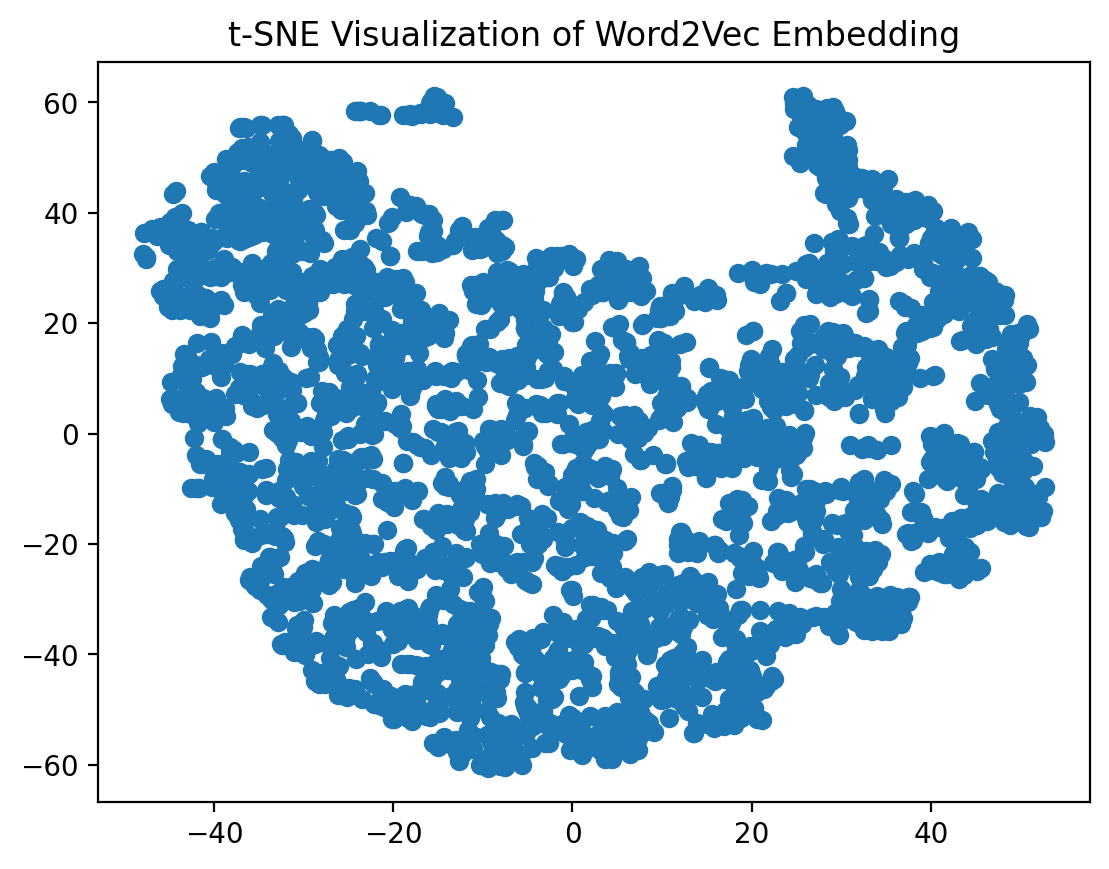

In [65]:
from gensim.models import Word2Vec
from gensim.models.phrases import Phrases
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

bigram_phrases = Phrases(reviews_pre, min_count=20)
model = Word2Vec(bigram_phrases[reviews_pre], vector_size=200, window=5, min_count=20)
embedding = model.wv.vectors
tsne = TSNE(n_components=2)
embedding_tsne = tsne.fit_transform(embedding)

plt.scatter(embedding_tsne[:, 0], embedding_tsne[:, 1])
plt.title("t-SNE Visualization of Word2Vec Embedding")
plt.show()

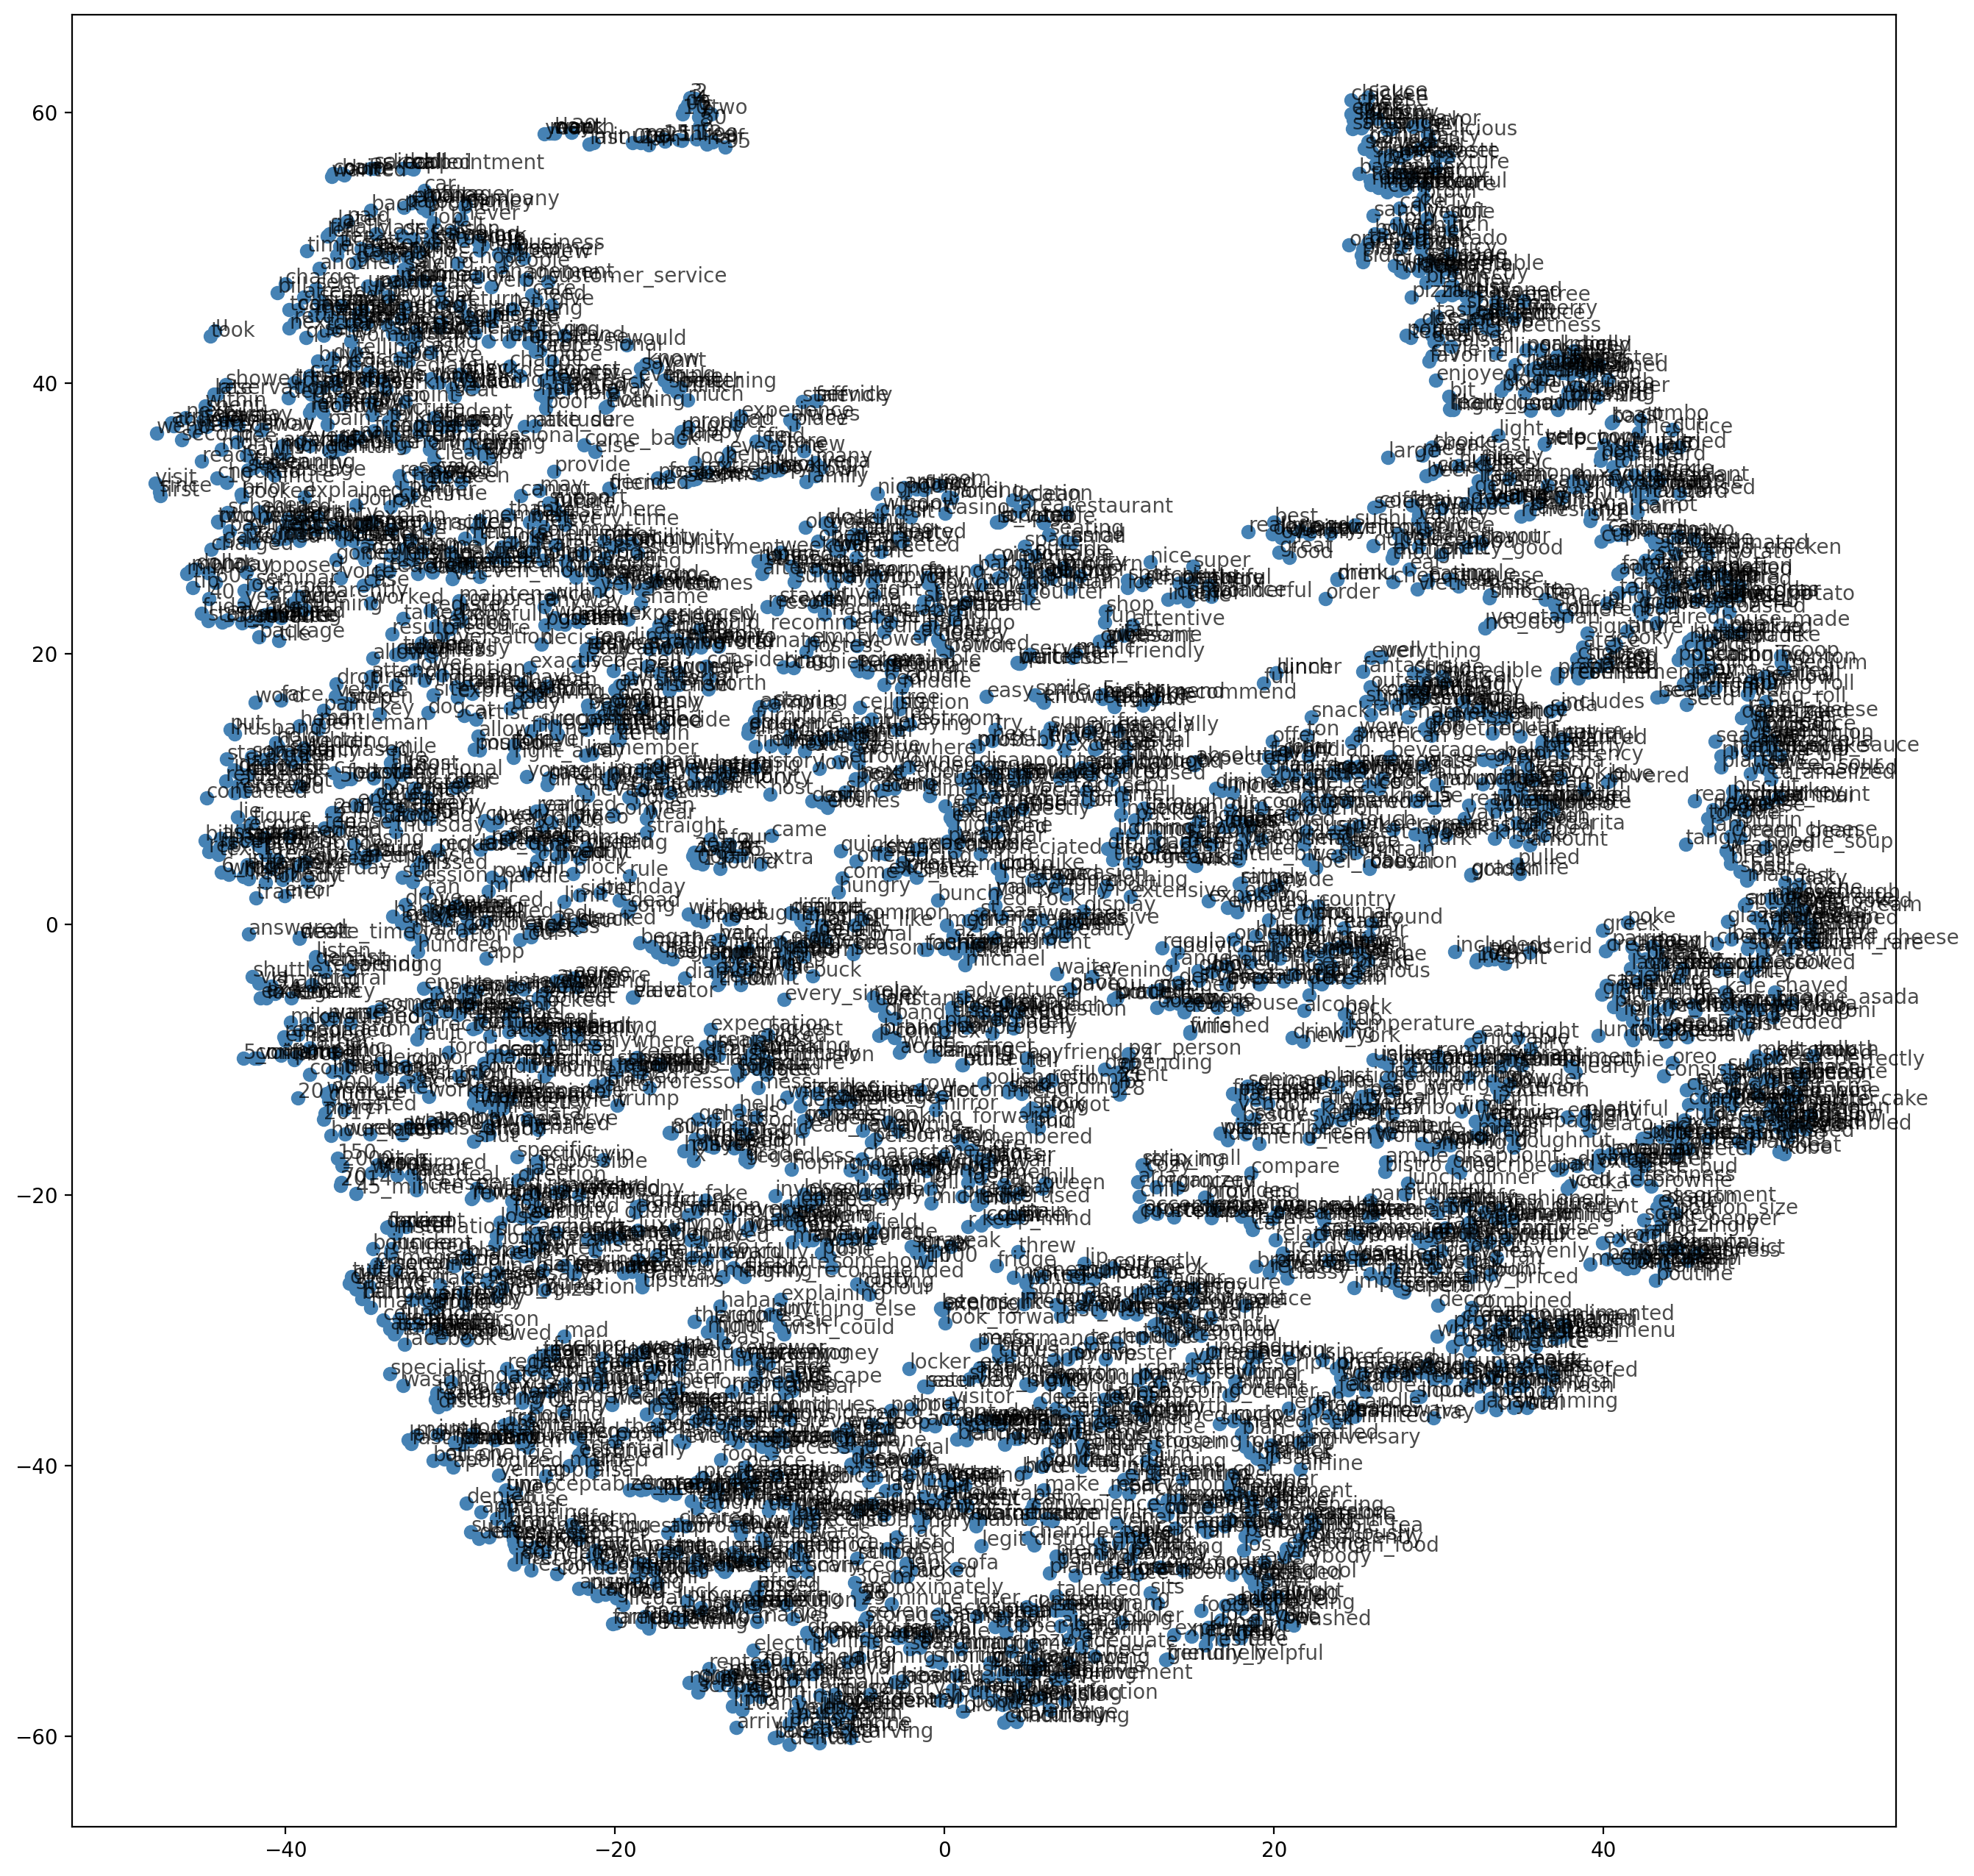

In [66]:
fig, ax = plt.subplots(figsize=(16, 16))
for idx, word in enumerate((model.wv.index_to_key)):
    plt.scatter(*embedding_tsne[idx, :], color='steelblue')
    plt.annotate(word, (embedding_tsne[idx, 0], embedding_tsne[idx, 1]), alpha=0.7)

## 5.2 Análisis del  *Word2Vec* 

Utilice el método `.most_similar` del word2vec que acaba de entrenar para encontrar las palabras más similares a los términos `breakfast`, `great` y  `wrong`. ¿Cree que el modelo ha sido capaz de aprender la semantica del cospus?

In [70]:
model.wv.most_similar('breakfast')

[('choice', 0.9886399507522583),
 ('cocktail', 0.9821795225143433),
 ('french', 0.9804023504257202),
 ('ramen', 0.9800827503204346),
 ('classic', 0.9761929512023926),
 ('generous', 0.9755510091781616),
 ('choose', 0.9754409193992615),
 ('thai', 0.9752572178840637),
 ('bbq', 0.9749675393104553),
 ('burrito', 0.9731298685073853)]

In [71]:
model.wv.most_similar('great')

[('overall', 0.9650468230247498),
 ('attentive', 0.9463428854942322),
 ('quality', 0.9366053938865662),
 ('friendly', 0.9232960939407349),
 ('atmosphere', 0.9181819558143616),
 ('definitely', 0.9151228666305542),
 ('food', 0.9149635434150696),
 ('fast', 0.9042251110076904),
 ('decor', 0.8957661390304565),
 ('love', 0.8949243426322937)]

In [72]:
model.wv.most_similar('wrong')

[('needed', 0.9940639734268188),
 ('leave', 0.9937041401863098),
 ('refund', 0.9935042262077332),
 ('fix', 0.9914512634277344),
 ('knew', 0.9905385971069336),
 ('process', 0.9881470203399658),
 ('spoke', 0.9880095720291138),
 ('answer', 0.9870628118515015),
 ('happened', 0.9858831763267517),
 ('guy', 0.9853289723396301)]

## 5.3 Representación de las *reviews* a partir del *Word2Vec* 

En esta sección vamos a representar cada documento con el `word2vec` promedio de las palabras de cada *review*. Para facilitar este cálculo las siguientes celdas de código generan una lista con el vocabulario de las *reviews* y otra lista con el vocabulario del *embedding*. A partir de ellas:
1. Construya una matriz con los embeddings para las palabras del vocabulario de las *reviews*. Llame a esta matriz `embeddings_vocab`
2. Genere un *embedding* por *review* como el producto escalar del BoW de esa review y `embeddings_vocab`. De este modo estará calculando un promedio ponderado de los *embeddings* para las palabras en esa review.
3. Normalice el *embedding* de cada documento a norma 1 para compensar el efecto de los documentos más largos frente a los documentos con menos palabras. Para ello puede usar la función `normalize_dense_vector` que le damos a continuación.

Si lo desea, con ayuda del t-SNE, puede representar estos embeddings en un espacio bidimensional.


In [73]:
def normalize_dense_vector(s):
  norm1 = np.linalg.norm(s, axis =1)
  norm1[norm1==0] =1
  return (s.T/norm1).T

In [74]:
# Vocabulario de las reviews
vocab_reviews = list(D.values()) 
print(len(vocab_reviews))
print(vocab_reviews)

1000
['10', '11', '15', '5', '99', 'add', 'average', 'away', 'best', 'cafe', 'called', 'chicken', 'cup', 'customer', 'drink', 'enjoy', 'every', 'fantastic', 'fish', 'five', 'four', 'fresh', 'friend', 'get', 'go', 'good', 'great', 'group', 'guy', 'hour', 'line', 'lol', 'love', 'lucky', 'lunch', 'meat', 'might', 'nice', 'non', 'okay', 'one', 'order', 'ordered', 'photo', 'place', 'review', 'see', 'shrimp', 'sign', 'soft', 'sorry', 'star', 'steak', 'step', 'taco', 'thought', 'tried', 'u', 'well', 'working', '9', 'amazing', 'appreciate', 'arrived', 'business', 'chance', 'close', 'come', 'could', 'date', 'decor', 'dinner', 'dish', 'entire', 'eye', 'food', 'la', 'meal', 'perfectly', 'potato', 'prepared', 'restaurant', 'rib', 'rock', 'seated', 'show', 'soup', 'stopped', 'super', 'table', 'truly', 'vega', 'want', 'window', 'yummy', '2', '20', 'actually', 'almost', 'always', 'amount', 'authentic', 'bad', 'came', 'cuisine', 'decent', 'enough', 'even', 'event', 'ever', 'finally', 'first', 'foot', 

In [75]:
# Vocabulario del embedding
vocab_emb = list(model.wv.vocab)
print(len(vocab_emb))
print(vocab_emb)

AttributeError: The vocab attribute was removed from KeyedVector in Gensim 4.0.0.
Use KeyedVector's .key_to_index dict, .index_to_key list, and methods .get_vecattr(key, attr) and .set_vecattr(key, attr, new_val) instead.
See https://github.com/RaRe-Technologies/gensim/wiki/Migrating-from-Gensim-3.x-to-4

In [ ]:
#<SOL>

#</SOL>

## 5.4 Estimación de los *ratings* a partir de la representación  *Word2Vec* 

Utilice la representación anterior de cada *review* para estimar su *rating* mediante un modelo *Ridge Regresion* lineal.

In [ ]:
#<SOL>

#</SOL>

# Ejercicio 6 (EXTRA). Utilización de modelos *Word2Vec* preentrenados 

Repita el ejercicio anterior, pero utilizando el *Word2Vec* preentrenado de Google News. La siguiente celda de código carga este modelo para su uso y extrae los *embeddings*. Tenga en cuenta que este modelo preentrenado no tiene porque incluir todas las palabras del vocabulario de las *reviews*, así que para las palabras que no estén, simplemente no las tenga en cuenta para generar el *embedding* promedio de la *review*.

In [ ]:
import gensim.downloader as api

wv = api.load('word2vec-google-news-300')

In [ ]:
# get embeddings
embeddings = wv.vectors 

# Vocabulario del embedding
vocab_emb = list(wv.vocab)
print(len(vocab_emb))
print(vocab_emb)

In [ ]:
#<SOL>

#</SOL>